# Regression

In this notebook, we will learn how to perform regression analysis in Python.

## Table of Contents

* [Linear Regression](#linear-regression)
    * [Model 1](#The-one-variable-linear-regression-model)
    * [Model 2](#The-multiple-linear-regression-model)
    * [Correlation considerations](#Correlation)
    * [Final Model](#Why-is-it-important-to-check-for-correlation?)
    * [Train and Test](#Train-and-Test-Sets-(splitting-the-data))

## Linear Regression

Linear regression is a statistical model that attempts to show the relationship between two variables. It is often used to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable (or sometimes, the outcome variable). The variable we are using to predict the other variable's value is called the independent variable (or sometimes, the predictor variable).

The equation for a linear regression model is:

$$y = \beta_0 + \beta_1 x$$

where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ is the intercept, and $\beta_1$ is the coefficient for $x$.

In this section, we will use the Bordeaux wine dataset shown during the lecture to perform linear regression in Python.

### Importing the Data

In [ ]:
%pip install -r https://raw.githubusercontent.com/vrughetti/python4DS/main/requirements.txt

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/egarpor/handy/master/datasets/wine.csv', encoding='utf-8')
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


Check dimensions of the data.

In [3]:
wine.shape

(27, 7)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         27 non-null     int64  
 1   Price        27 non-null     float64
 2   WinterRain   27 non-null     int64  
 3   AGST         27 non-null     float64
 4   HarvestRain  27 non-null     int64  
 5   Age          27 non-null     int64  
 6   FrancePop    27 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.6 KB


In [5]:
wine.describe(include="all")

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1966.814815,7.041948,608.407407,16.477781,144.814815,16.185185,50085.443963
std,8.246384,0.634590,129.034956,0.659189,73.065849,8.246384,3792.998764
min,1952.000000,6.204900,376.000000,14.983300,38.000000,3.000000,43183.569000
25%,1960.500000,6.508350,543.500000,16.150000,88.000000,9.500000,46856.000000
50%,1967.000000,6.984500,600.000000,16.416700,123.000000,16.000000,50650.406000
75%,1973.500000,7.441500,705.500000,17.008350,185.500000,22.500000,53511.207500
max,1980.000000,8.493700,830.000000,17.650000,292.000000,31.000000,55110.236000


#### The one-variable linear regression model

In [6]:
model1 = LinearRegression()
AGST = wine.AGST.values.reshape((-1, 1)) # X
Price = wine.Price.values # y
model1.fit(AGST, Price)

LinearRegression()

In [7]:
intercept = model1.intercept_
slope = model1.coef_

In [21]:
print("Slope: ", slope)
print("Intercept: ", intercept)
r2 = model1.score(AGST, Price)
print("R2: ", r2)

Slope:  [0.64261426]
Intercept:  -3.546909269361324
R2:  0.44558940170937356


Bordeaux Wine Model (one-variable):

$$\text{price} = -3.54 + 0.64 * \text{AGST}$$

#### The multiple linear regression model

In [14]:
var1 = wine.AGST.values.reshape((-1, 1))
var2 = wine.HarvestRain.values.reshape((-1, 1))
X = np.concatenate((var1,var2), axis = 1)

In [15]:
model2 = LinearRegression()
model2.fit(X, Price)

LinearRegression()

In [22]:
r_sq2 = model2.score(X, Price)
intercept2 = model2.intercept_
slope2 = model2.coef_

print("Slope: ", slope2)
print("Intercept: ", intercept2)
print("R2: ", r_sq2)

Slope:  [ 0.6298525  -0.00425109]
Intercept:  -2.72100309841373
R2:  0.6849893473859592


Bordeaux Wine Model (two-variables):

$$\text{price} = -2.72 + 0.62 * \text{AGST} + -0.004 * \text{HarvestRain}$$

#### Correlation

In [23]:
wine.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.460409,0.051184,-0.294883,-0.058850,-1.000000,0.992279
Price,-0.460409,1.000000,0.134880,0.667525,-0.507185,0.460409,-0.481072
WinterRain,0.051184,0.134880,1.000000,-0.321132,-0.267989,-0.051184,0.029451
AGST,-0.294883,0.667525,-0.321132,1.000000,-0.027084,0.294883,-0.301261
HarvestRain,-0.058850,-0.507185,-0.267989,-0.027084,1.000000,0.058850,-0.032015
Age,-1.000000,0.460409,-0.051184,0.294883,0.058850,1.000000,-0.992279
FrancePop,0.992279,-0.481072,0.029451,-0.301261,-0.032015,-0.992279,1.000000


> **Note** that having a `high correlation` value between an independent variable and the dependent variable (Price) is a good thing. The issue arises when there is high correlation between two independent variables. This is called `multi-collinearity`.

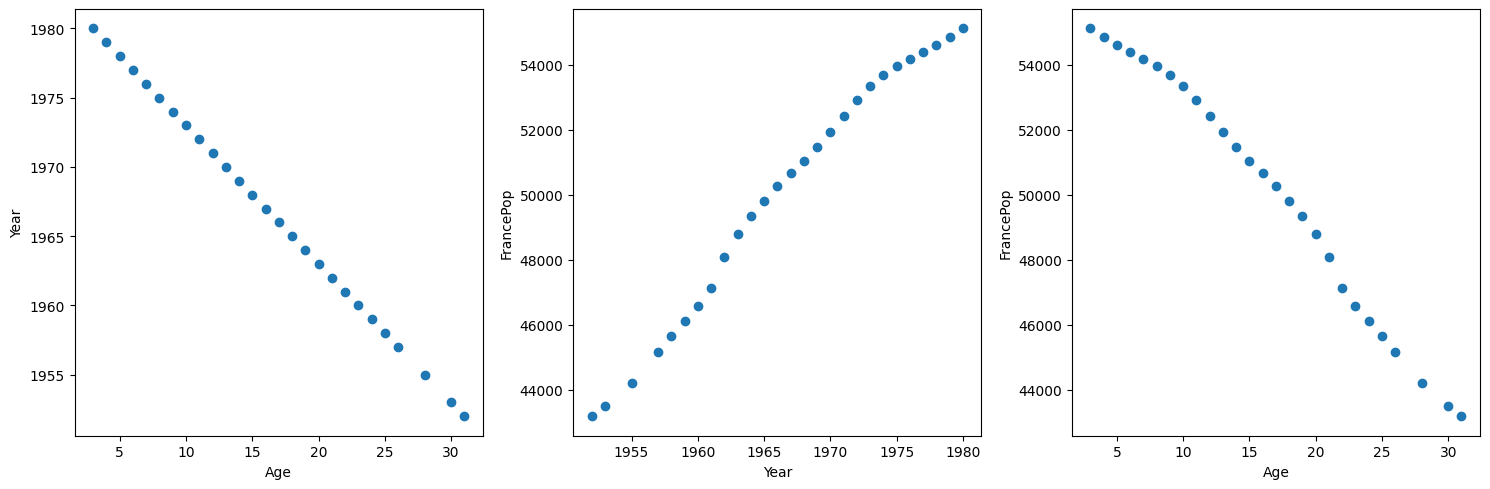

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(wine.Age, wine.Year)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Year')
axes[1].scatter(wine.Year, wine.FrancePop)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('FrancePop')
axes[2].scatter(wine.Age, wine.FrancePop)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('FrancePop')
fig.tight_layout()

Notice that Year and Age are absolutely negatively correlated (-1 correlation coefficient). This makes sense since the older the year the grapes were harvested, the older the age of the wine.

Two other pairs of highly correlated independent variables is Year & FrancePop and Age & FrancePop.

#### Why is it important to check for correlation?

If *A* is correlated with *B*, then we cannot interpret the coefficients of neither A nor B. 

To see why, imagine the extreme case when A=B (perfect correlation). 

Then, the model y=100A+50B is the same as the model y=5A+10B or y=-2000A+4000B.

Because of multi-collinearity, we must remove the insignificant variables.

In [38]:
var1 = wine.AGST.values.reshape((-1, 1))
var2 = wine.HarvestRain.values.reshape((-1, 1))
var3 = wine.WinterRain.values.reshape((-1,1))
var4 = wine.Age.values.reshape((-1,1))
X = np.concatenate((var1,var2,var3,var4), axis = 1)

In [39]:
model3 = LinearRegression()
model3.fit(X, Price)

LinearRegression()

In [42]:
r_sq3 = model3.score(X, Price)
intercept3 = model3.intercept_
slope3 = model3.coef_

print("Slope: ", slope3)
print("Intercept: ", intercept3)
print("R2: ", r_sq3)

Slope:  [ 0.61639156 -0.0038606   0.00116672  0.02384801]
Intercept:  -3.6515703302351863
R2:  0.8275317042479993


Bordeaux Wine Model (removed collinearity variables):

$$\text{price} = -3.65 + 0.61 * \text{AGST} + -0.0038 * \text{HarvestRain} + 0.001 * \text{WinterRain} + 0.023 * \text{Age}$$

We have obtained a model with a higher $R^2$ value due to the removal of the collinearity variables.

---

### Train and Test Sets (splitting the data)

Then we need to split into a training set and a test set. We will use the `train_test_split` function from the `sklearn.model_selection` module to do this.

In [94]:
X = wine.drop(['Price', 'Year', 'FrancePop'], axis=1)
y = wine['Price']

We will use 80% of the data for training and 20% for testing. We will also set the `random_state` parameter to 1 to ensure that we get the same split every time we run the code.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [96]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

In [98]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 0.09128388807103897
Root Mean Squared Error: 0.3021322360673203
Mean Absolute Error: 0.22489018643390649
R-squared: 0.5924853390903895


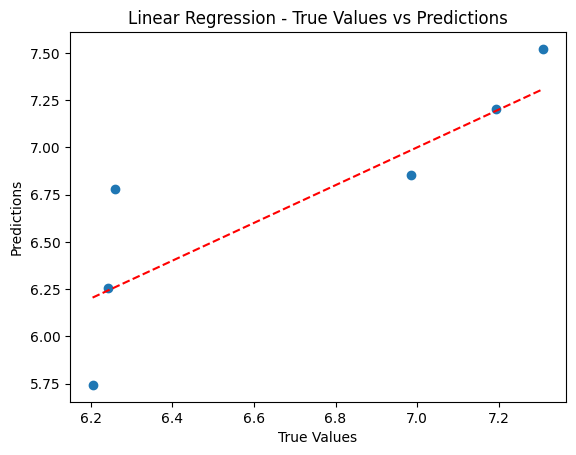

In [99]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plotting the results
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression - True Values vs Predictions')
plt.show()

After splitting the data, we can see that $R^2$ is lower than the one we obtained without splitting into train and test sets. This is because we are using less data to train the model.

Remember that we went from

In [51]:
wine.shape

(27, 7)

To X and y being:

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 4), (6, 4), (21,), (6,))

Even if we raised the test set to 40% of the data, we would still get a lower $R^2$ value than the one we obtained without splitting into train and test sets.

Always keep in mind these statements:

> **The more data you have, the better your model will be.**

> **Garbage in, garbage out.**

So make sure always to have a good dataset to train your model; otherwise, you will get a bad model. 

**Models are only as good as the data you feed them.**

---

# What's next?

Next notebook: [Classification](https://github.com/vrughetti/python4DS/blob/main/notebooks/classification/classification.ipynb)